In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow


In [4]:
x_train = pd.read_csv('/content/drive/MyDrive/pro_gst/Train_data/X_Train_Data_Input.csv')

In [5]:
x_train.isna().sum()

,0
ID,0
Column0,9
Column1,0
Column2,0
Column3,126303
Column4,127710
Column5,167180
Column6,3850
Column7,0
Column8,3850


In [ ]:
x_train = pd.read_csv('/content/drive/MyDrive/pro_gst/Train_data/X_Train_Data_Input.csv').drop(['Column5','Column9','Column14'],axis=1)
y_train = pd.read_csv('/content/drive/MyDrive/pro_gst/Train_data/Y_Train_Data_Target.csv')
df = pd.merge(x_train, y_train, on = 'ID')
x_train.drop('ID',axis=1, inplace=True)
y_train.drop('ID',axis=1, inplace=True)

# x_test = pd.read_csv('/content/drive/MyDrive/pro_gst/Test_data/X_Test_Data_Input.csv').drop(['Column5','Column9','Column14'],axis=1)
# y_test = pd.read_csv('/content/drive/MyDrive/pro_gst/Test_data/Y_Test_Data_Target.csv')

In [ ]:
df['Column6'] = df['Column6'].fillna(df['Column6'].interpolate())
df['Column8'] = df['Column8'].fillna(df['Column8'].interpolate())
df['Column15'] = df['Column15'].fillna(df['Column15'].interpolate())
df['Column3'] = df['Column3'].fillna(df['Column3'].interpolate())
df['Column4'] = df['Column4'].fillna(df['Column4'].interpolate())
df['Column0'] = df['Column0'].fillna(df['Column0'].interpolate())
# df.dropna(inplace=True)

In [ ]:
xtrain = df.drop('target',axis=1)
ytrain = df['target']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pro_gst/linear_imupted_dataset (1).csv').drop('Unnamed: 0',axis=1)
xtrain = df
df['target'] = ytrain
# ytrain = train_df['target']

In [ ]:
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
print(x_train.shape)
print(y_train.shape)

(785133, 19)
(785133, 1)


In [ ]:
df.shape

(785133, 24)

In [ ]:
len(df)-len(df.dropna())

733637

In [ ]:
print(y_train['target'].value_counts())

target
0    711100
1     74033
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64


In [ ]:
df.describe()

,Column0,Column1,Column2,Column3,Column4,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440754,1321.788614,2951.279411,-0.000407,-0.000926,-0.000749,0.000727,-0.000135,0.240575,0.310443,0.363122,0.328285,-0.000791,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,1.163269,907.267965,2143.140140,0.960544,0.960524,0.997748,1.045883,1.055018,0.427433,0.462675,0.480900,0.469589,1.269948,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.407939,-0.015607,-0.774979,0.000000,0.000000,0.000000,0.000000,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.407939,-0.015607,-0.774979,0.000000,0.000000,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.407939,-0.015607,0.119264,0.000000,0.000000,0.000000,0.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.366129,-0.015607,0.624474,0.000000,1.000000,1.000000,1.000000,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,14.985817,201.687947,323.992484,1.000000,1.000000,1.000000,1.000000,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
try:
  corr_matrix = df.drop('ID', axis=1).corr()
except:
  corr_matrix = df.corr()

threshold = 0.7
high_corr = (corr_matrix.abs() > threshold) & (corr_matrix != 1.000)
correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
for i in range(len(corr_matrix.index))
    for j in range(i + 1, len(corr_matrix.columns))
        if high_corr.iloc[i, j]]
print("\nHighly correlated pairs:")
for pair in correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Highly correlated pairs:
Column3 and Column4: 0.89
Column10 and Column11: 0.84
Column10 and Column12: 0.75
Column10 and Column13: 0.81
Column11 and Column12: 0.80
Column11 and Column13: 0.81
Column12 and Column13: 0.82
Column18 and target: 0.73


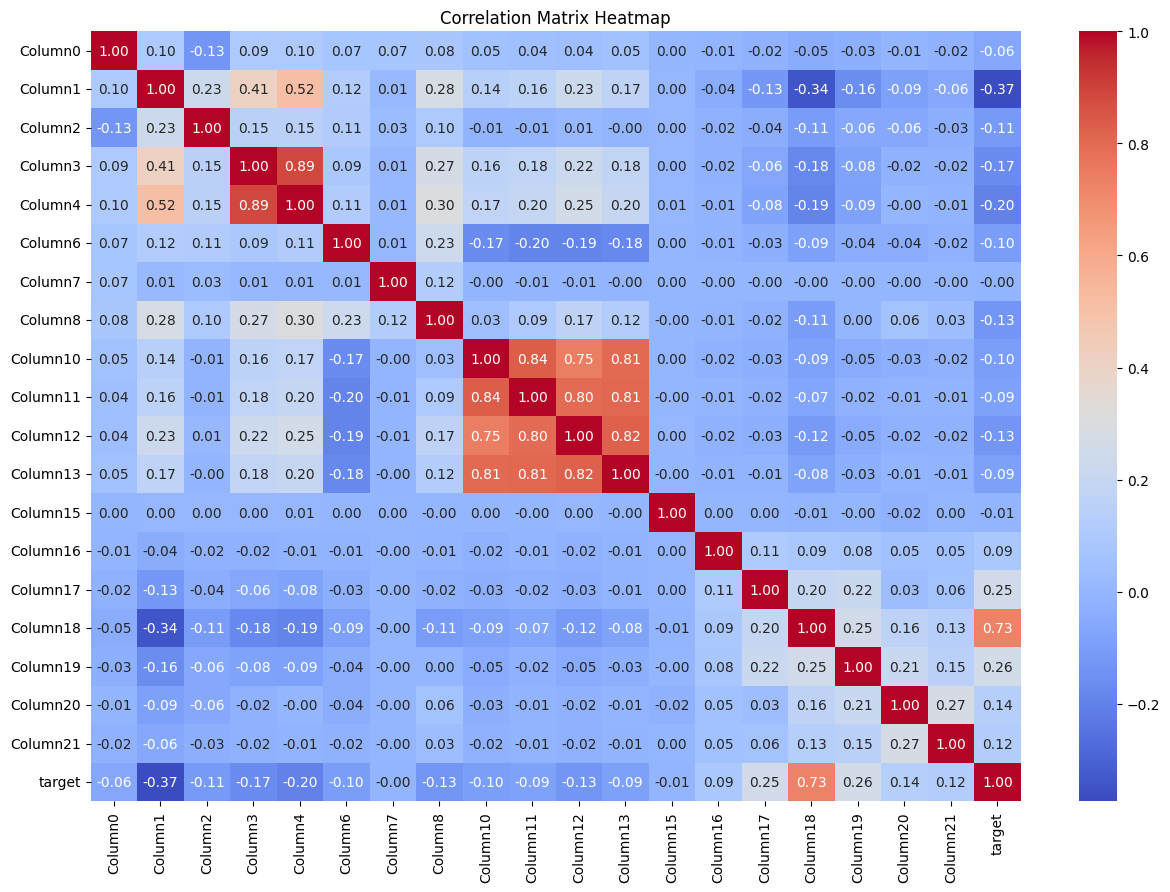

In [ ]:
# Set the plot size for better visibility
plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix Heatmap')
# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Show the plot
plt.show()

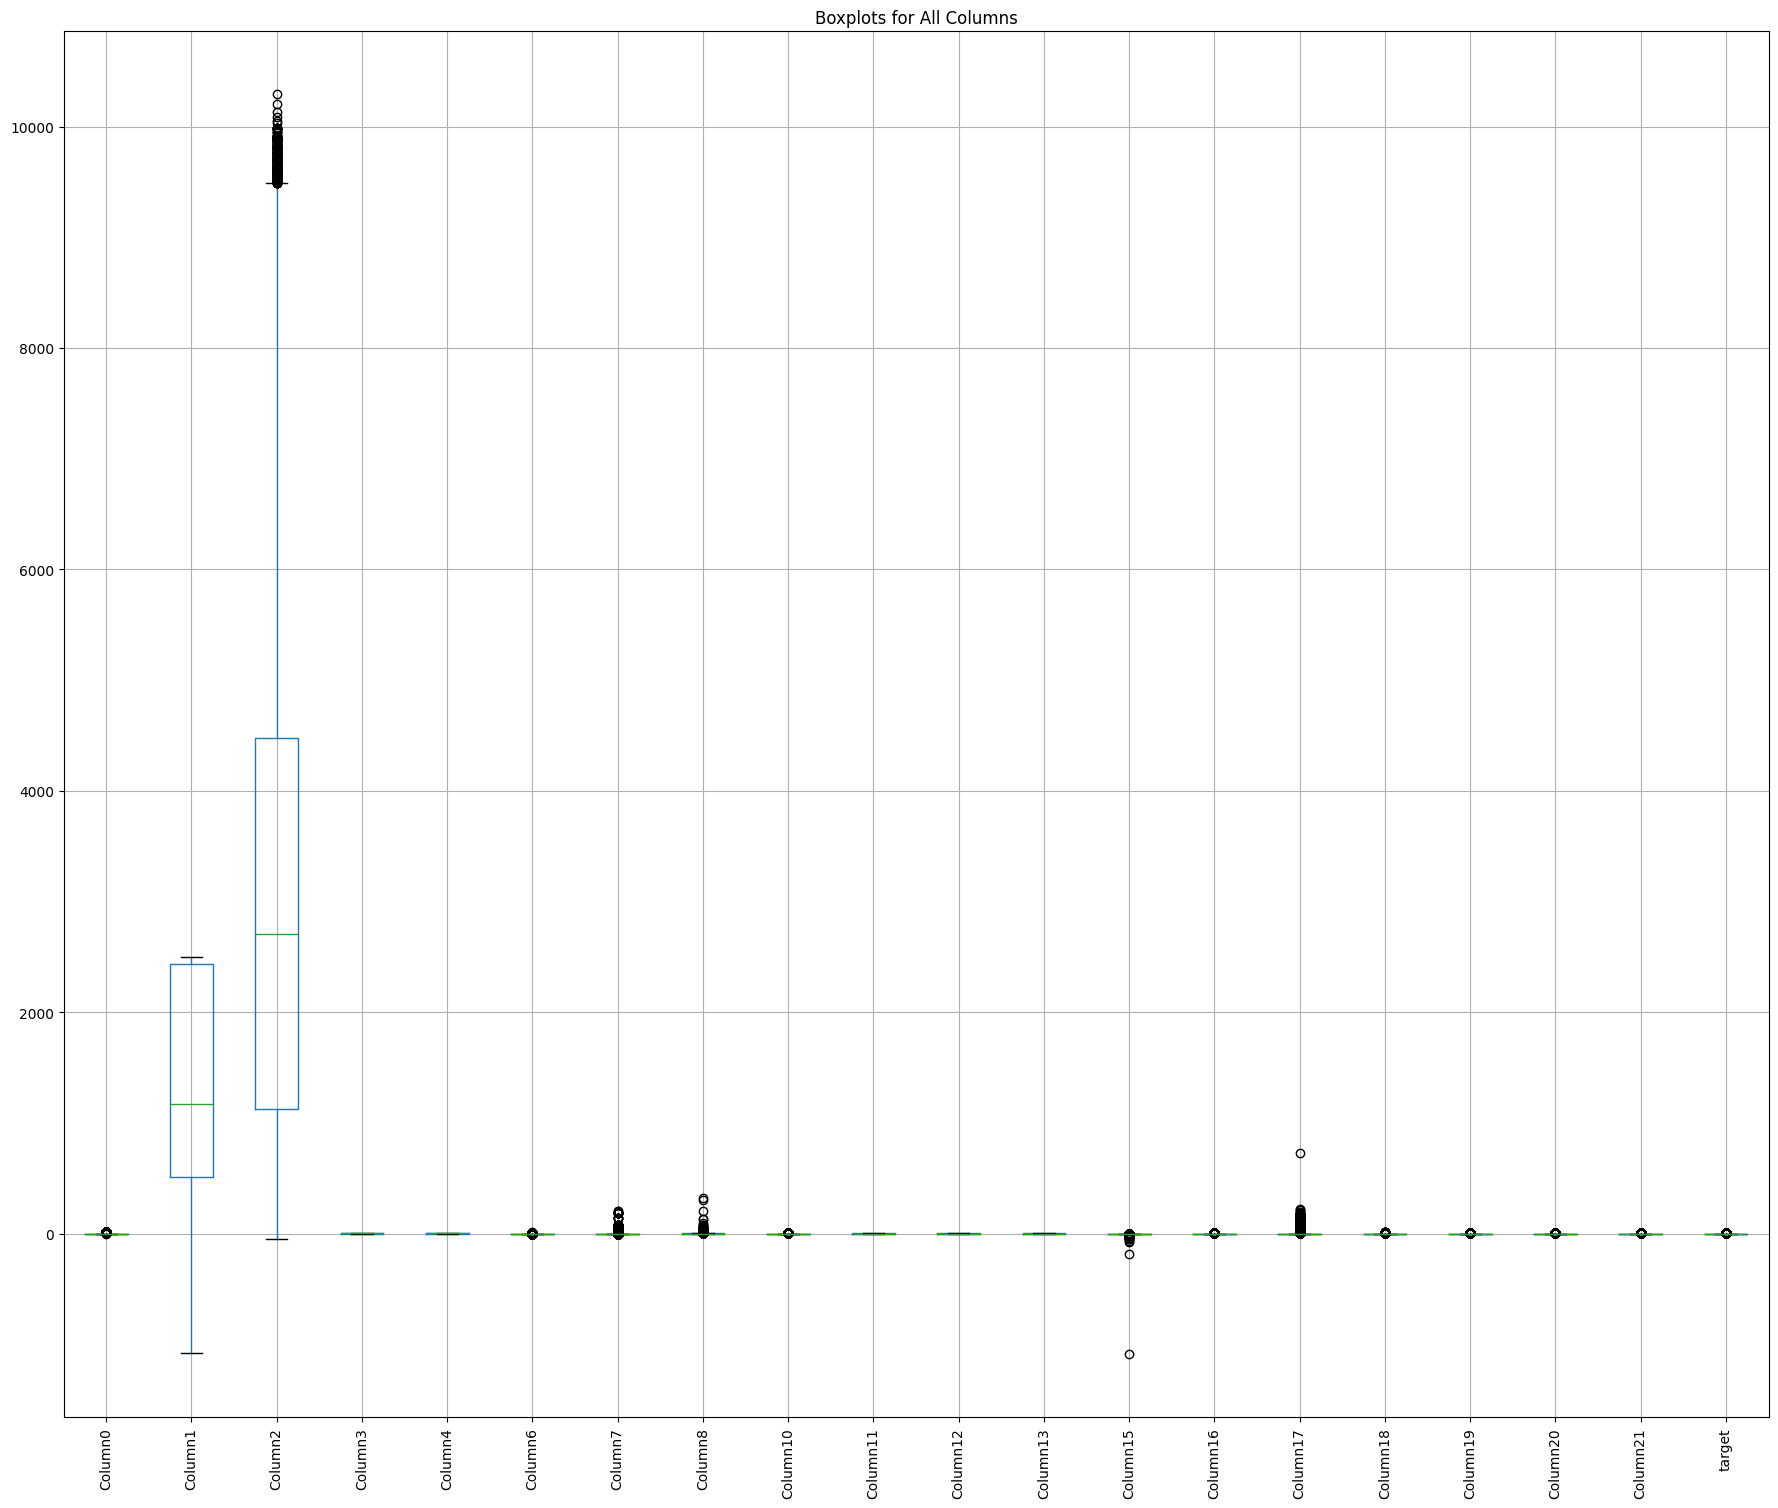

In [ ]:
plt.figure(figsize=(22, 18))
df.boxplot()
plt.title('Boxplots for All Columns')
plt.xticks(rotation=90)
plt.show()

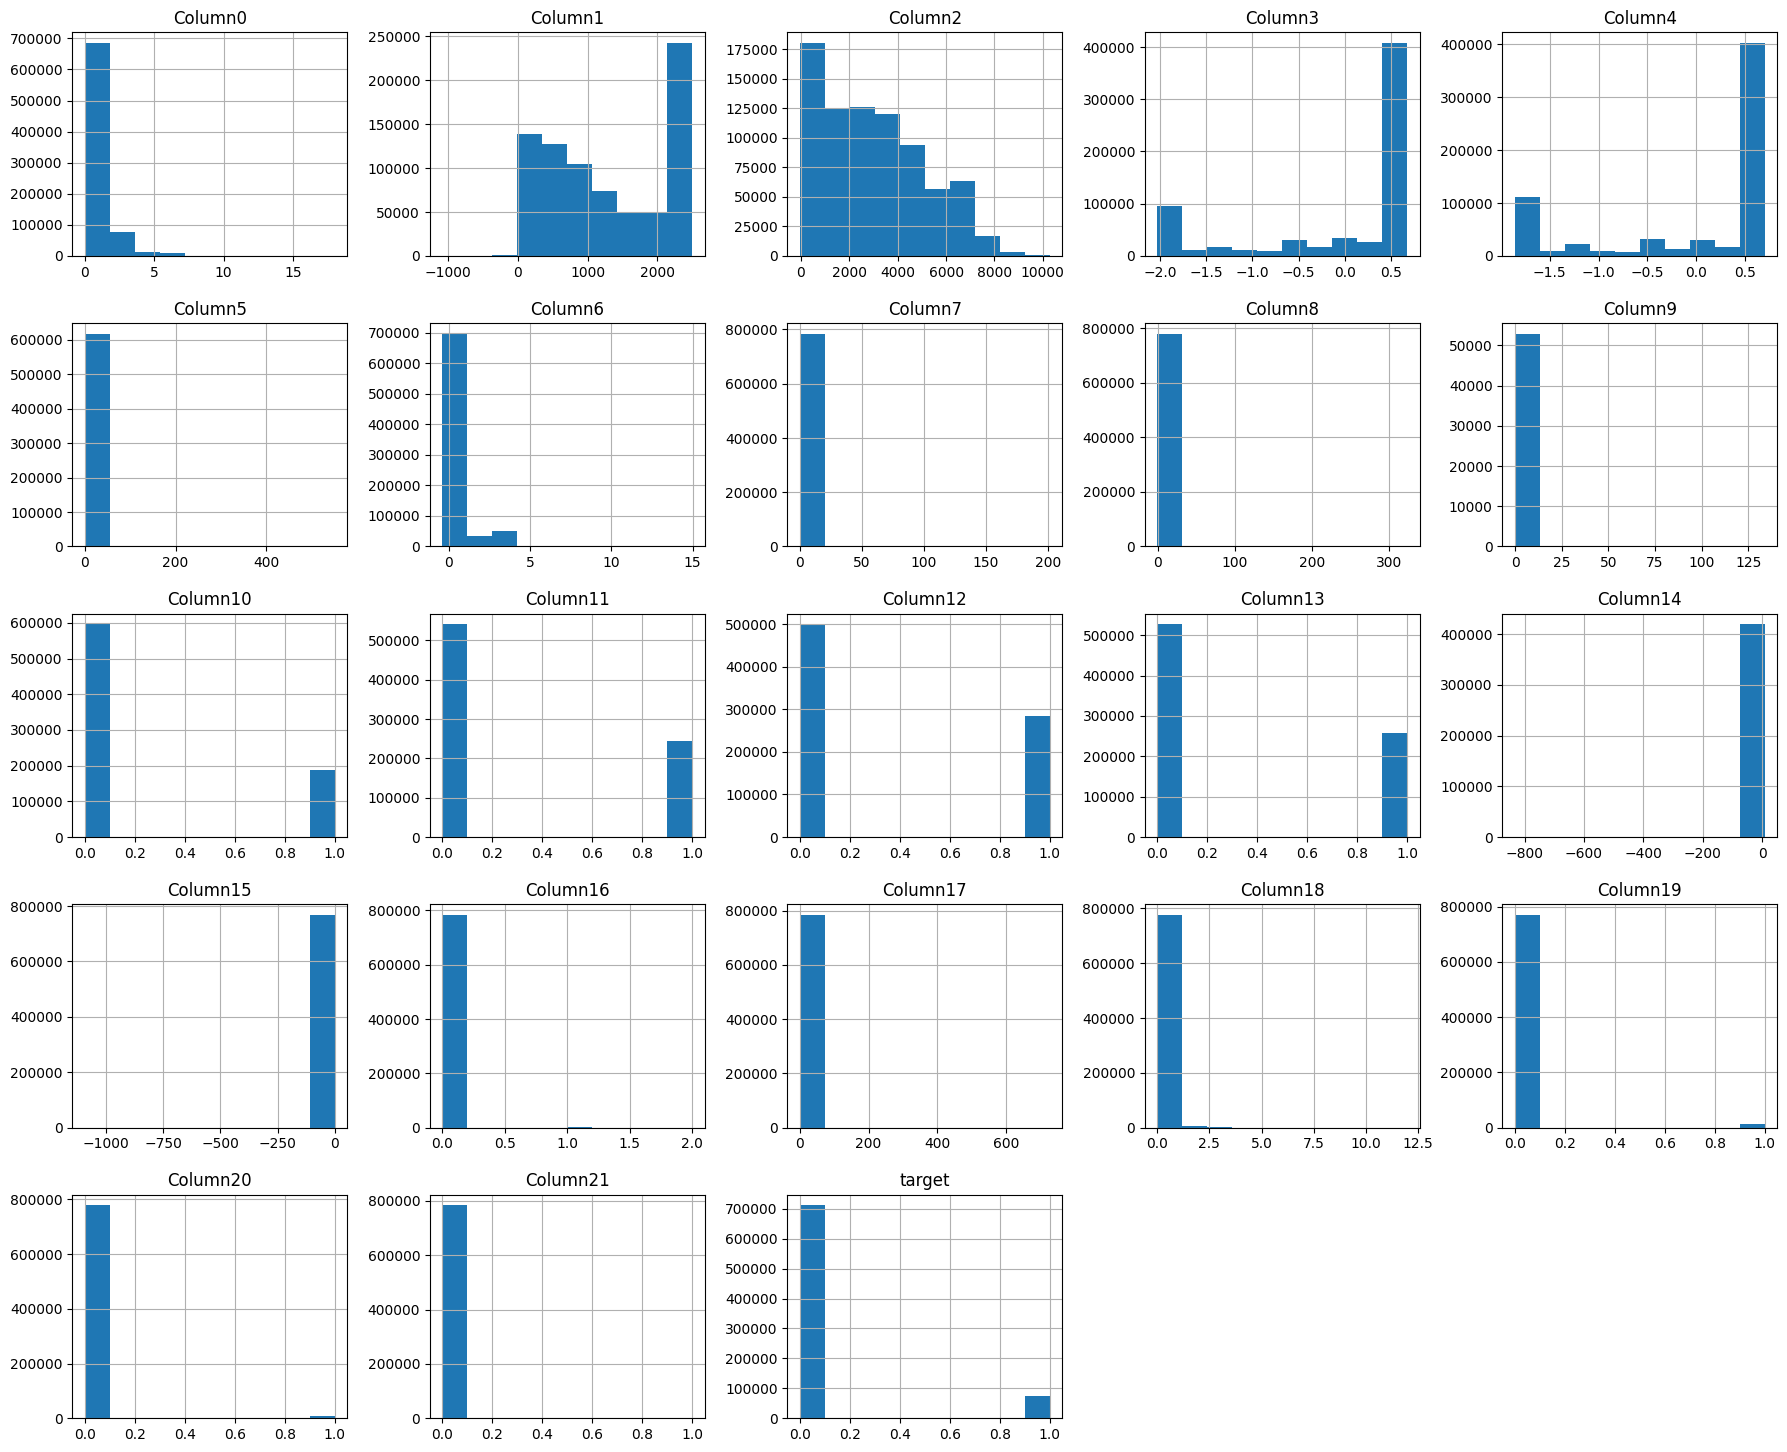

In [ ]:
df.hist(figsize=(22, 18))
plt.show()

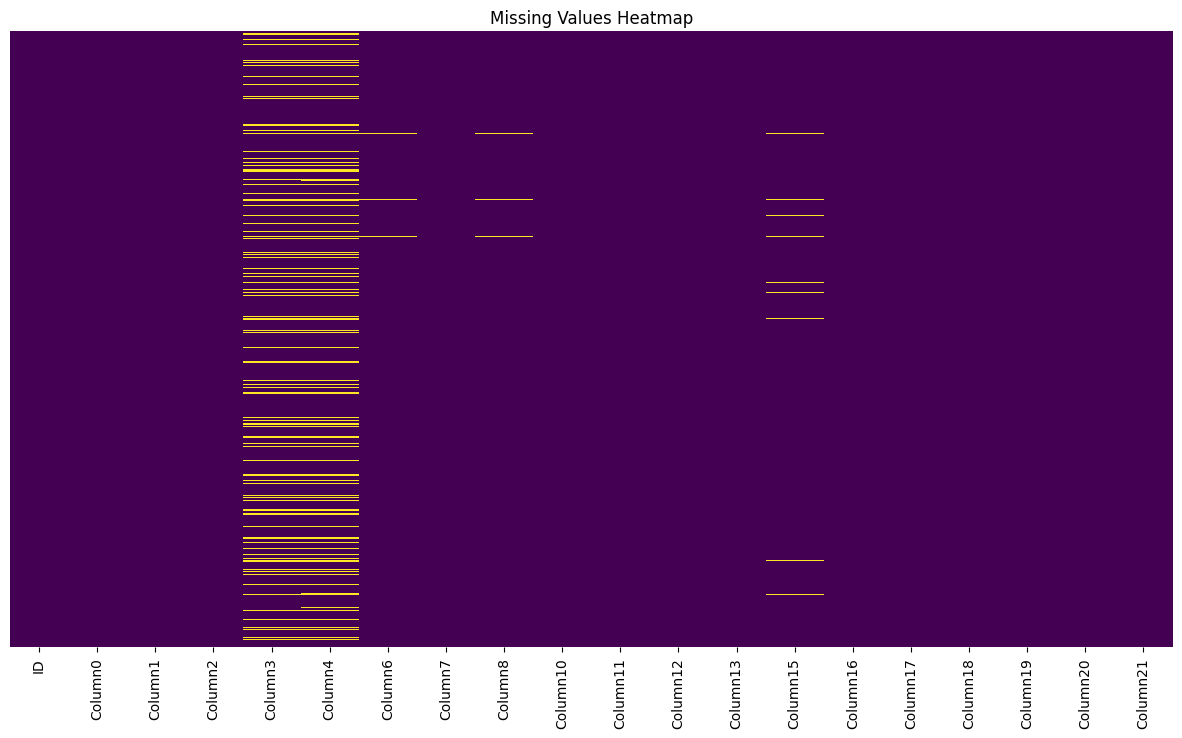

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Missing Values Heatmap')
sns.heatmap(x_train.drop(['Column5','Column9','Column14'],axis=1).isnull(), yticklabels=False,cbar=False, cmap='viridis')# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(8, 15))
plt.title('Missing Values Heatmap')
sns.heatmap(x_train[['Column3','Column4']].isnull(), yticklabels=True,cbar=False, cmap='viridis')
plt.show()

In [ ]:
def plot_scatter_matrix(df):
    """
    Create a scatter plot matrix for all numeric columns in the DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame
    """
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    sns.pairplot(df[numeric_columns])
    plt.tight_layout()
    plt.show()

def plot_residuals(X, y):
    """
    Create a residual plot for a simple linear regression.

    Parameters:
    X (array-like): The input features
    y (array-like): The target variable
    """
    model = LinearRegression().fit(X, y)
    residuals = y - model.predict(X)

    plt.scatter(model.predict(X), residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

def plot_qq(data):
    """
    Create a Q-Q plot for the given data.

    Parameters:
    data (array-like): The input data
    """
    data = data.values.flatten()
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Q-Q Plot")
    plt.show()
    # stats.probplot(data, dist="norm", plot=plt)
    # plt.title("Q-Q Plot")
    # plt.show()

def correlation_coefficient(X, y):
    """
    Calculate the Pearson correlation coefficient.

    Parameters:
    X (array-like): The input features
    y (array-like): The target variable

    Returns:
    float: The correlation coefficient
    """
    if isinstance(X, pd.DataFrame): # Check if X is DataFrame
        X = X.to_numpy() # Convert to NumPy array
    if isinstance(y, pd.DataFrame): # Check if y is a DataFrame
        y = y.to_numpy() # Convert to NumPy array
    if X.ndim == 2:
        X = X.flatten() # Flatten X if it's 2D to ensure proper correlation
    return np.corrcoef(X, y.flatten())[0, 1]
    # return np.corrcoef(X.flatten(), y)[0, 1]

def reset_test(X, y, power=2):
    """
    Perform the RESET test for linearity.

    Parameters:
    X (array-like): The input features
    y (array-like): The target variable
    power (int): The highest power to include in the test

    Returns:
    float: The p-value of the test
    """
    X = np.column_stack((np.ones(X.shape[0]), X))
    y_pred = np.dot(X, np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y))

    augmented_X = np.column_stack([X] + [y_pred**i for i in range(2, power+1)])
    augmented_model = np.linalg.inv(np.dot(augmented_X.T, augmented_X)).dot(augmented_X.T).dot(y)

    df1 = power - 1
    df2 = X.shape[0] - X.shape[1] - power + 1
    f_stat = ((np.dot(y.T, y) - np.dot(augmented_model.T, np.dot(augmented_X.T, y))) / df1) / \
             ((np.dot(augmented_model.T, np.dot(augmented_X.T, y)) - np.dot(y.T, y)) / df2)

    p_value = 1 - stats.f.cdf(f_stat, df1, df2)
    return p_value

def rainbow_test(X, y):
    """
    Perform the Rainbow test for linearity.

    Parameters:
    X (array-like): The input features
    y (array-like): The target variable

    Returns:
    float: The p-value of the test
    """
    rainbow_statistic, rainbow_p_value = linear_rainbow(y, X)
    return rainbow_p_value



In [ ]:
# Example usage:
# Assuming 'df' is your DataFrame and 'X' and 'y' are your feature and target variables
# plot_scatter_matrix(df)
# plot_residuals(X, y)
# plot_qq(y)

# corr = correlation_coefficient(X, y)
# reset_p_value = reset_test(X, y)
# rainbow_p_value = rainbow_test(X, y)

In [ ]:
y_train.head()

,target
0,0
1,0
2,0
3,1
4,0


from matplotlib import pyplot as plt
_df_0['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

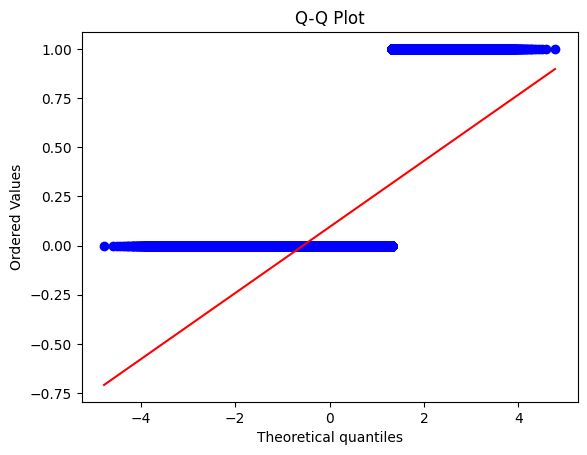

In [ ]:
plot_qq(y_train)

In [ ]:
rainbow_test(xtrain, ytrain)

TypeError: res must be a results instance from a linear model.

In [ ]:
ytrain.shape

(785133,)

In [ ]:
xtrain.shape

(785133, 20)

Column0


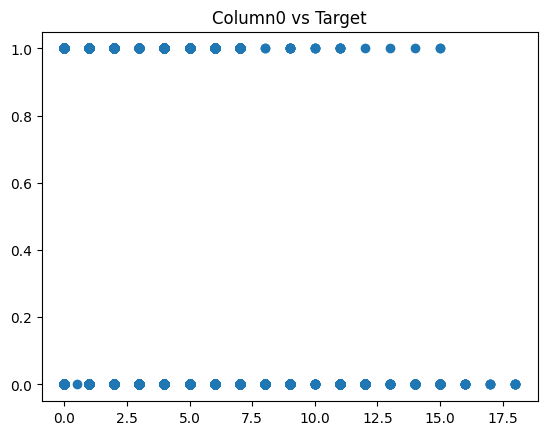

Column1


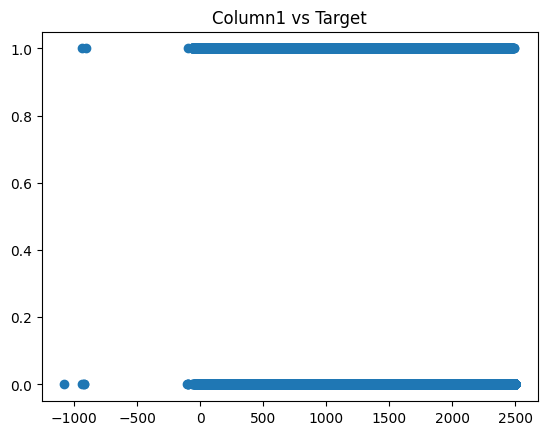

Column2


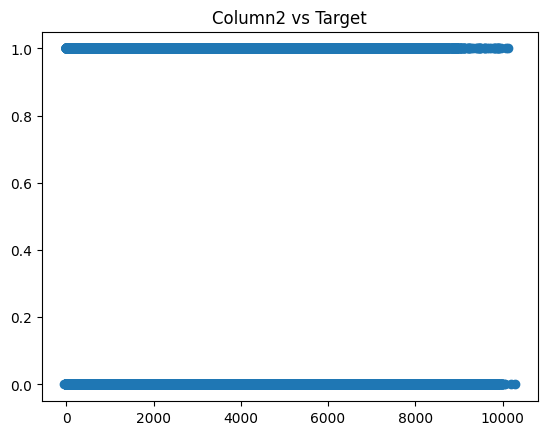

Column3


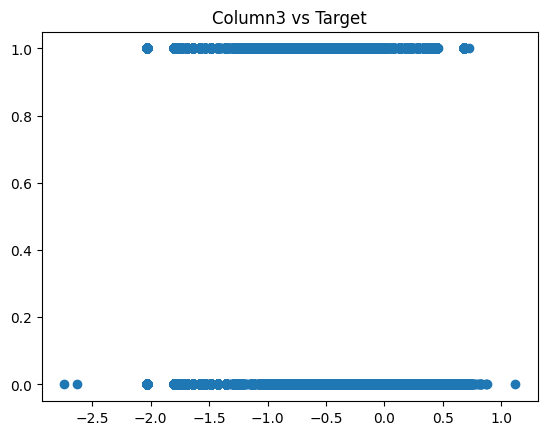

Column4


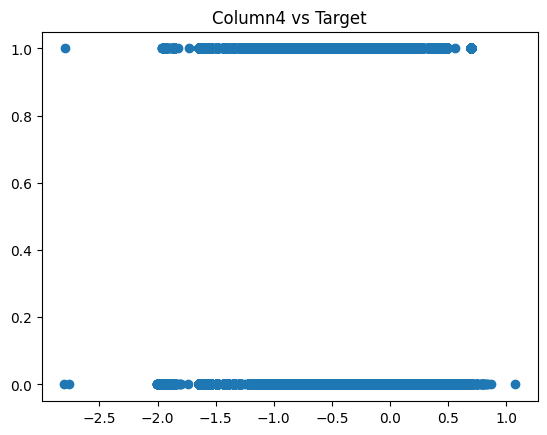

Column6


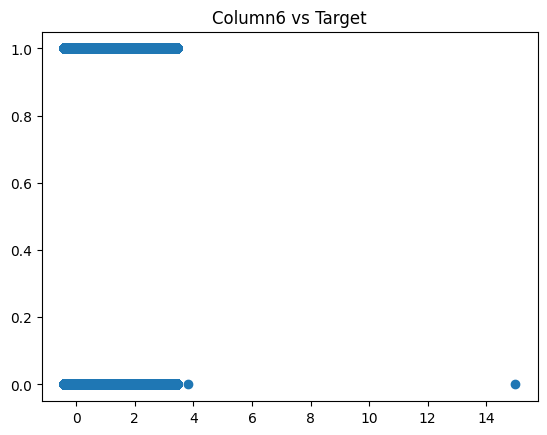

Column7


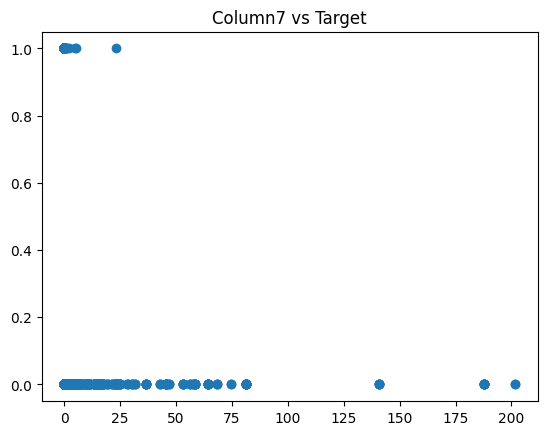

Column8


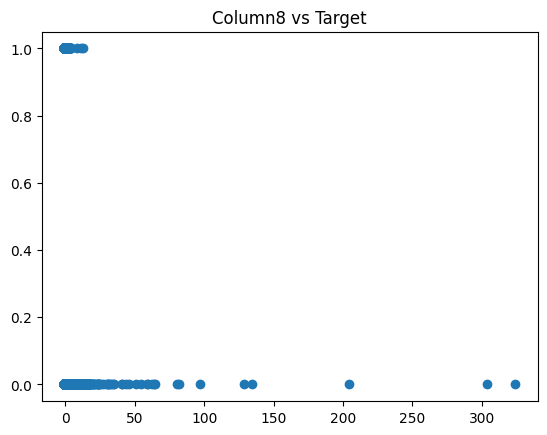

Column10


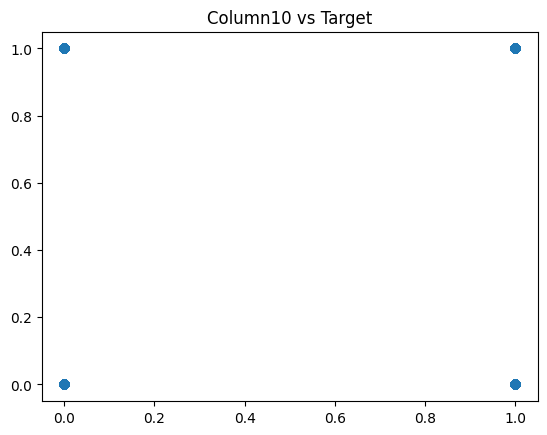

Column11


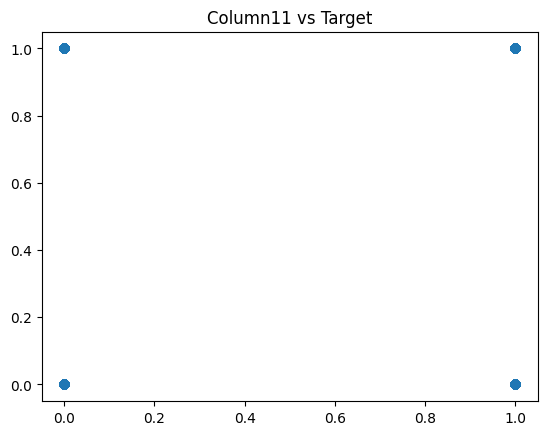

Column12


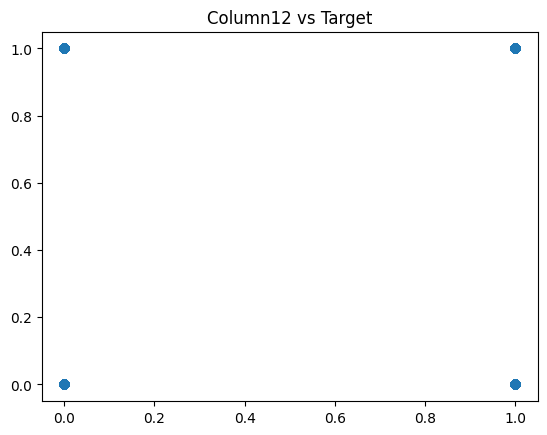

Column13


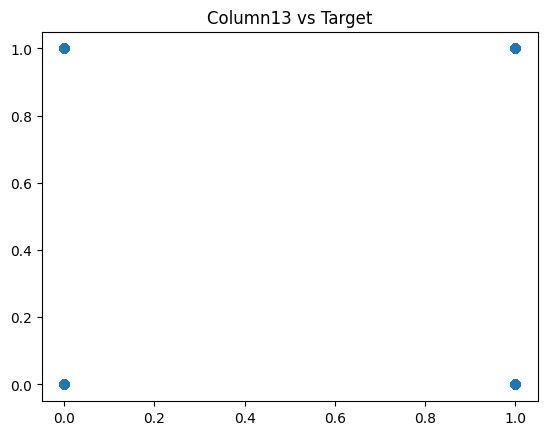

Column15


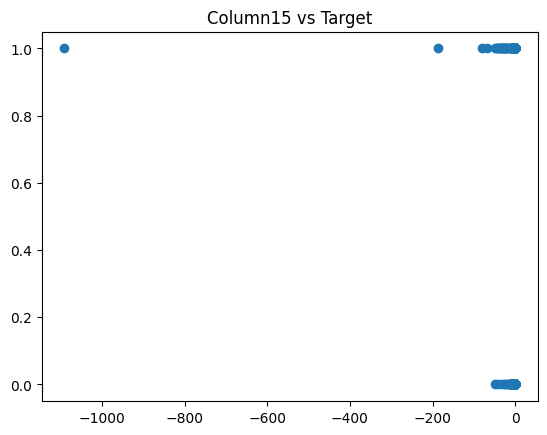

Column16


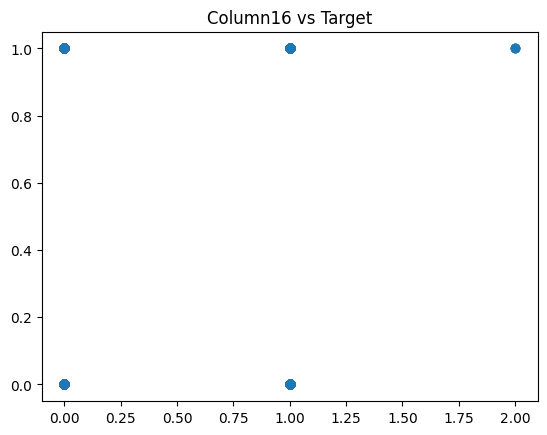

Column17


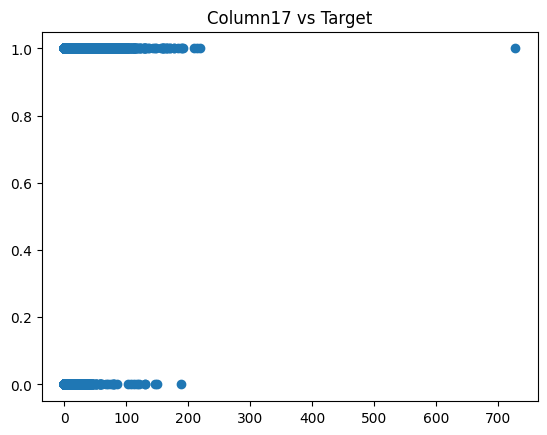

Column18


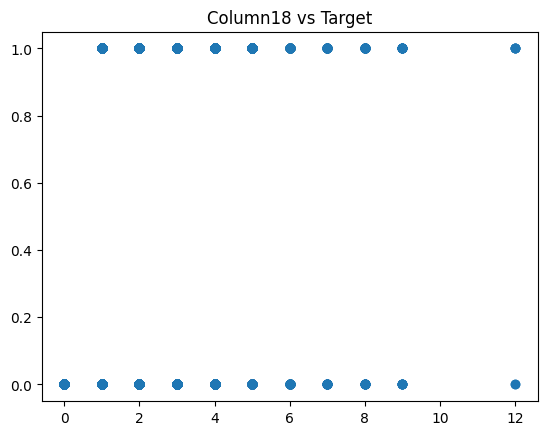

Column19


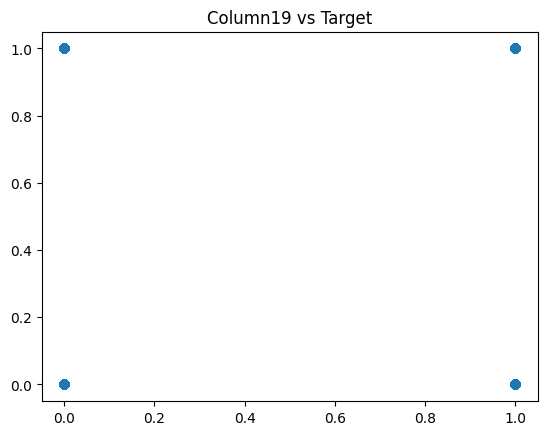

Column20


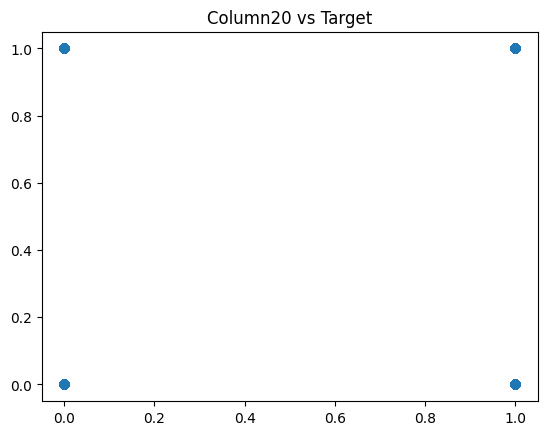

Column21


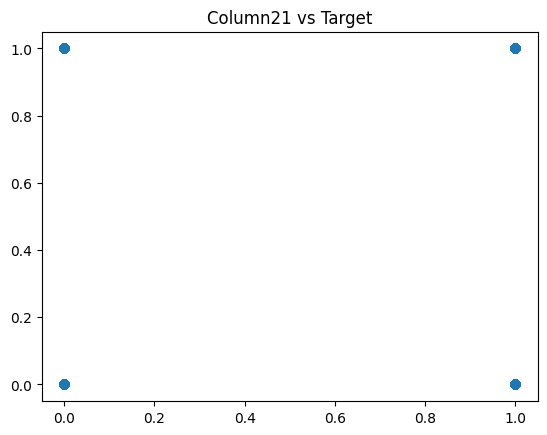

target


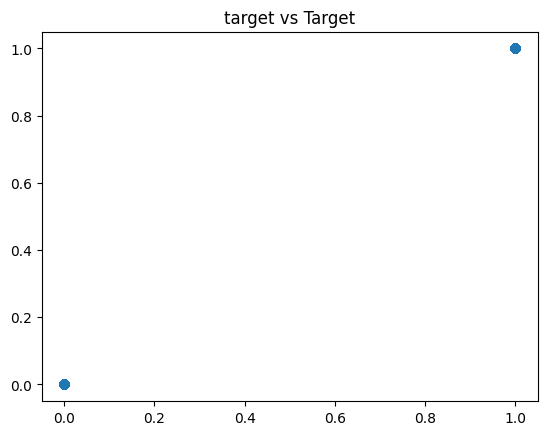

In [ ]:
for col in xtrain.columns:
  plt.scatter(xtrain[col], ytrain)
  plt.title(f'{col} vs Target')
  plt.show()